# Submission details
*   **Name**: Aditya Verma
*  **Student ID**: 12948511
*   **Subject**: 42028 Deep Learning and Convolutional Neural Network - Autumn 2020





# Instructions about setting up and running this Notebook
*  This notebook assumes the MNIST handwritten digits are downloaded in their originaly downloaded .gz file format. 
*  Please note the location of the directoy will need to be changed before in order to access the files in the root directory.


#Imports and Drive mounting
There are various libraries that need to be included to complete and evaluate the classifications.

Mount to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import struct # used to convert native Python data types
import numpy as np # used to support for large, multi-dimensional arrays and matrices, and complete high level math functions
import matplotlib.pyplot as plt #collection of functions in the popular visualization package
import itertools #provides various functions that work on iterators to produce complex iterators
import seaborn as sns # This is used for better visualization of data (ex. confusion matrix)

from skimage import feature # This is used for LBP feature extraction

from sklearn import metrics # This is used for scoring of predictions

from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix # In order to plot data graphically

from sklearn.metrics import classification_report # for better evaluation of how classifier performed

# Will make plot outputs appear and be stored within the notebook.
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#0. Data preperation and Visualisation
In this thread, MNIST Files will be prepared and processed for classification.

##0.1 Sets working directory
The working directory should point to the root folder to where this file is located. It will assume that the .gzip MNIST files are located in the SAME folder

In [3]:
# Changing to the working directory to access MNIST dataset
cd /content/drive/My Drive/42028-DL-CNN-2020/Assignment

/content/drive/My Drive/42028-DL-CNN-2020/Assignment


###0.1.1 Read MNIST .gzip files
This function will read the .gzip files provided by MNIST on their website.It will initially unzip the files using the package ."gzip" and then prepare the file to be read by the classifiers.

In [0]:
import gzip # Package to help unzip the mnist files

In [0]:
# Unzips the 4 downloaded MNIST files
def read_mnist(filename):
  # gzip unzips the files downloaded from MNIST digit recognition 
  with gzip.open(filename, 'rb') as f:
    # Unpack from the buffer according to string
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    # Returns the file after being processed
    return np.fromstring(f.read(), dtype = np.uint8).reshape(shape)

###0.1.2 Assigns the training and testing dataset .idx files to global variables
*  'X' indicates images
*  'y' inidicates labels
*   The Images are flattened to prepare for prediction by the classifiers


In [11]:
# Using the read_mnist function to assign the file a variable name.

raw_train = read_mnist("train-images-idx3-ubyte.gz") 
# X_train is images from the training dataset
X_train = np.reshape(raw_train, (60000, 28*28))
# y_train is the labels for training dataset
y_train = read_mnist("train-labels-idx1-ubyte.gz") 

raw_test = read_mnist("t10k-images-idx3-ubyte.gz")
# X_test is images from the testing dataset
X_test = np.reshape(raw_test, (10000, 28*28))
# y_test is labels from the testing dataset
y_test = read_mnist("t10k-labels-idx1-ubyte.gz")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


##0.2 Data Visualisation
Necessary to visualize the data that is being worked with before beginning classification. From this block of code, a random set of digits from the dataset will be printed with their corresponding label number.

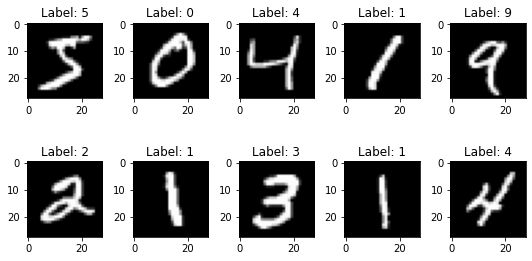

In [0]:
num = 10
images = raw_train[:num]
labels = y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

#1. SVM (Support vector Machine)
An SVM classifier will be setup. The neccessary library is taken from sklearn and will assist with applying variables to the model.

##Imports

In [0]:
# This pacakge is used for SVM classification
from sklearn import svm

##1.1 Raw Input

In [0]:
# Dividing by 255.0 to normalise the data and ensure it is in grayscale
svm_X_test = X_test/255.0
svm_X_train = X_train/255.0
svm_y_test = y_test
svm_y_train = y_train

### 1.1.1 SVM Model

The rbf kernel has been use for SVM classification. C = 5, and a gamma value of 0.05 have been assigned as they produce the highest accuracy 

In [0]:
print("Running model...")
svm_clf = svm.SVC( kernel='rbf', C=5, gamma=0.05 ) 
# Gamma will determine how much the kernel will be influenced on the model 
svm_clf.fit( svm_X_train, svm_y_train ) #Fitting the training model to the model

Running model...


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Running the model on the testing dataset

In [0]:
svm_y_pred = svm_clf.predict(svm_X_test) #Prediction on the testing dataset

###1.1.2 SVM Test results

expected result: 98.4%

In [0]:
print("Generating score of predicition...")
# Generates a score on the prediction made by the SVM model
svm_clf_score = svm_clf.score( svm_X_test, svm_y_test )

# Model Accuracy: how often is the classifier correct?
print( "Test set Accuracy: {:.1f}".format( svm_clf_score * 100 ),'%' )

Generating score of predicition...
Test set Accuracy: 98.4 %


In [0]:
# show a final classification report demonstrating the accuracy of the digits predicted
print("Evaluation of testing data given the classification")\
print( classification_report( svm_y_test, svm_y_pred ) )

### 1.1.2 Confusion Matrix

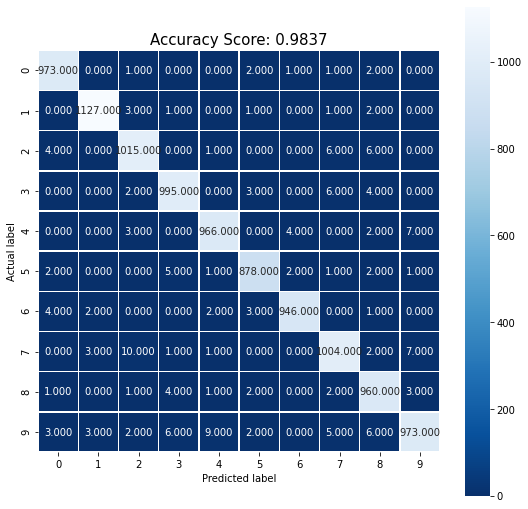

In [0]:
cm  = metrics.confusion_matrix(y_test, svm_y_pred) # Generating confusion matrix using the metrics library
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9)) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); #colours
plt.ylabel('Actual label'); # y axis label
plt.xlabel('Predicted label'); #x axis label
all_sample_title = 'Accuracy Score: {0}'.format(svm_clf_score) #title of graph
plt.title(all_sample_title, size = 15);

##1.2 Local Binary Pattern (LBP)

Currently image is at 784 pixels which is a one directional image, LBP and HoG will be working on the image, therefore it  to  is transformed into 28 by 28 pixel image.

In [0]:
svm_lbp_X_train = X_train.reshape(-1,28,28) #This will unflatten the dataset thus becoming a 2D image. 
svm_lbp_X_test= X_test.reshape(-1,28,28) # Both the testing and training image sets will be unflattened

# returns the size of the reshape to confirm that this worked corretly
print("Train dataset after reshaping:{}".format(np.shape(svm_lbp_X_train)))
print("Test dataset after reshaping :{}".format(np.shape(svm_lbp_X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


###1.2.1 LBP Class 
Features of the image will be extracted in this class when called by the other functions.

In [0]:
class svm_LocalBinaryPatterns:

	def __init__(self, numPoints, radius):
		# number of points and the radius are assigned local variables
		# These will keep track the features of the images being passed through the function
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the LBP features of the digits
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Building the histogram to plot the patterns of the images features extracted
		(hist, _) = np.histogram(lbp.ravel(),  #generates the histogram
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		hist = hist.astype("float") # normalize the histogram to ensure grayscale
		hist /= (hist.sum() + eps)
 
		# return the histogram generated by LBP
		return hist

Feature extraction for the training dataset. The class above is used to extract the features.

In [0]:
desc = svm_LocalBinaryPatterns(24, 8) # Initalize the LBP pattern descriptions with numpoints = 24 and radius = 8
svm_lbp_data_train = [] # list for training data
svm_lbp_labels_train = [] #list for label train

for img_index in range(len(svm_lbp_X_train)): # loop over the training images
	# load the image, convert it to grayscale, and extract LBP features
	image = (svm_lbp_X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	svm_lbp_labels_train.append(y_train[img_index])
	svm_lbp_data_train.append(hist)

###1.2.2 SVM classification with LBP feature
expected to be (60000, 26)
(60000,)

In [0]:
## Create an instance of a SVM model 
svm_lbp_clf = svm.SVC(kernel='rbf', C=5, gamma=0.05) 
svm_lbp_clf.fit(svm_lbp_data_train, svm_lbp_labels_train) #fitting the test dataset to the classifer

print(np.shape(svm_lbp_data_train)) # Prints out the shape
print(np.shape(svm_lbp_labels_train)) # Prints out the shape

(60000, 26)
(60000,)


###1.2.3 Training set results
expected to me: Train set Accuracy: 0.37

In [0]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(svm_lbp_clf.score(svm_lbp_data_train, svm_lbp_labels_train)))

Train set Accuracy: 0.37


Testing using LBP 

In [0]:
svm_lbp_predictions=[] # list of the predictions
svm_lbp_predict_label=[] # list of the prediction labels
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(svm_lbp_X_test)): #loops throgh testing set
  imag = svm_lbp_X_test[im_index] # local variable for the images in the test
  # Extract LBP feature
  histo = desc.LBPfeatures(imag) #stores the histogram with the features of the image
  # Perform classification
  svm_lbp_prediction = svm_lbp_clf.predict(histo.reshape(1, -1)) # passes the prediction through the classifer
  
  svm_lbp_predictions.append(svm_lbp_prediction) # adds the processed data into the variable
  svm_lbp_predict_label.append(y_test[im_index]) # adds the processed data into the variable

Testing set results
expected result: Accuracy on test dataset: 37.54

In [0]:
svm_lbp_accuracy = metrics.accuracy_score(y_test, svm_lbp_predictions)
print("Accuracy on test dataset:",svm_lbp_accuracy*100)

Accuracy on test dataset: 37.54


###1.2.4 Confusion matrix

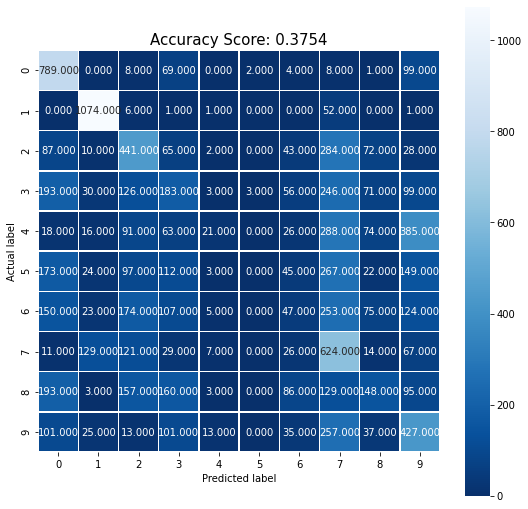

In [0]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, svm_lbp_predictions)
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm_lbp_accuracy)
plt.title(all_sample_title, size = 15);

##1.3 Histogram of Oriented Gradients (HoG)

Reshaping because HoG requires to get features from an image

In [0]:
svm_hog_X_train = X_train.reshape(-1,28,28)
svm_hog_X_test= X_test.reshape(-1,28,28)

# returns the size of the reshape
print("Train dataset after reshaping:{}".format(np.shape(svm_hog_X_train)))
print("Test dataset after reshaping :{}".format(np.shape(svm_hog_X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


###1.31 Feature extraction

In [0]:
print("Extracting features from training dataset...")
svm_hog_data_train = [] # list for training data
svm_hog_labels_train = [] # list for training labels

for img_index in range(len(svm_hog_X_train)): # Will loop over the training images for the feaure extraction
  image = (svm_hog_X_train[img_index]) # temp variable for the training images
  H = feature.hog(image, orientations=9, pixels_per_cell=(5, 5), #extracts the features from the images in the loop
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")

  svm_hog_data_train.append(H) # adds the features to the list
  svm_hog_labels_train.append(y_train[img_index]) # adds the features to the list

print(np.shape(svm_hog_data_train))
print(np.shape(svm_hog_labels_train))

Extracting features from training dataset...
(60000, 729)
(60000,)


Model

In [0]:
svm_hog_clf = svm.SVC(kernel = 'rbf', C=5, gamma=0.05) 
svm_hog_clf.fit(svm_hog_data_train, svm_hog_labels_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###1.3.2 Training set accuracy
should return 0.99

In [0]:
print("Train set Accuracy: {:.2f}".format(svm_hog_clf.score(svm_hog_data_train,svm_hog_labels_train)))

Train set Accuracy: 0.99


In [0]:
# initialize the data matrix and labels
print("Extracting features from MNIST testdataset...")
svm_hog_predict_test = []
svm_hog_labels_test = []
svm_hog_data_test=[]
# loop over the training images
for img_ind in range(len(svm_hog_X_test)):
  # load the image, and extract HOG features
  img = svm_hog_X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(5, 5),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")
  pred = svm_hog_clf.predict(H.reshape(1, -1))[0]
  # update the data and labels
  svm_hog_predict_test.append(pred)
  svm_hog_data_test.append(H)
  
  svm_hog_labels_test.append(y_test[img_ind])
  
print(np.shape(svm_hog_predict_test))
print(np.shape(svm_hog_labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


###1.3.3 Test accuracy
Accuracy for the test set. should return: Accuracy on test dataset: 0.9837

In [0]:
# Test set Accuracy
svm_hog_accuracy = metrics.accuracy_score(y_test, svm_hog_predict_test)
print("Accuracy on test dataset:",svm_hog_accuracy)

Accuracy on test dataset: 0.9837


###1.3.4 Confusion matrix

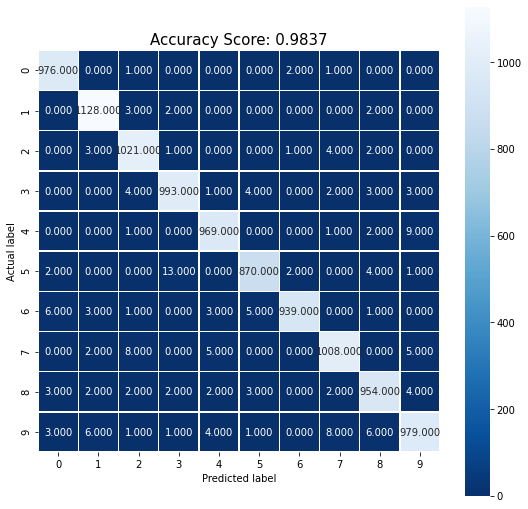

In [0]:
cm  = metrics.confusion_matrix(y_test, svm_hog_predict_test)
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm_hog_accuracy)
plt.title(all_sample_title, size = 15);

#2. K-NN (K-Nearest Neighbor)

##Imports and variable definitions

In [0]:
# This pacakge is used for SVM and K-NN classification
from sklearn import neighbors

Local variables for k-NN

##2.1 Raw Input

In [0]:
knn_X_test = X_test
knn_X_train = X_train

###2.1.1 K-NNModel

Create an instance of the KNN classifier with k=5.
Fit the model to the training dataset

In [0]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=5).fit(knn_X_train, y_train)

###2.1.2 k-NN Model Accuracy

In [0]:
# Calculate the predictions for y_test using the classifier (clf) model
knn_y_pred = knn_clf.predict(knn_X_test)

In [0]:
# Accuracy for the Testing set
knn_accuracy = knn_clf.score(knn_X_test, y_test)

k-NN with HoG Test set Accuracy: 97%

In [0]:
 # Prints the accuracy
print("k-NN with HoG Test set Accuracy: {:.1f}".format(knn_accuracy * 100),'%')

###2.2.1 confusion matrix

In [0]:
cm  = metrics.confusion_matrix(y_test, knn_y_pred)
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_accuracy)
plt.title(all_sample_title, size = 15);

###2.2.2 Examples of wrong predictions

In [0]:
num_row = 2
num_col = 4

idx = np.where((knn_clf == 7) & (y_test == 2))[0]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(idx)):
  ax = axes[i//num_col, i%num_col]
  imgplot = ax.imshow(np.reshape(ann_X_test[idx[i],:], (28,28)), cmap=plt.cm.get_cmap("Greys"))
  imgplot.set_interpolation("nearest")
  plt.xlabel(knn_clf[i]);
plt.show()

NameError: ignored

In [0]:
num_row = 2
num_col = 4

idx = np.where((ann_model_pred == 2) & (y_test == 7))[0]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(idx)):
  ax = axes[i//num_col, i%num_col]
  
  imgplot = ax.imshow(np.reshape(temp_ann_X_test[idx[i],:], (28,28)), cmap=plt.cm.get_cmap("Greys"))
  imgplot.set_interpolation("nearest")
  plt.xlabel(ann_model_pred[i]);
plt.show()

##2.2 Histogram of Oriented Gradients (HoG)

In [0]:
knn_hog_X_train = X_train.reshape(-1,28,28)
knn_hog_X_test = X_test.reshape(-1,28,28)

# returns the size of the reshape
print("Train dataset after reshaping:{}".format(np.shape(knn_hog_X_train)))
print("Test dataset after reshaping :{}".format(np.shape(knn_hog_X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [0]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
knn_hog_data_train = []
knn_hog_labels_train = []

# loop over the training images
for img_index in range(len(knn_hog_X_train)):
  # load the image, and extract HOG features
  image = (knn_hog_X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(5, 5),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  knn_hog_data_train.append(H)
  knn_hog_labels_train.append(y_train[img_index])

print(np.shape(knn_hog_data_train))
print(np.shape(knn_hog_labels_train))

Extracting features from training dataset...
(60000, 729)
(60000,)


###2.2.1 HoG k-NN model

In [0]:
# train the model and fit the training dataset to the model
knn_hog_clf = neighbors.KNeighborsClassifier(n_neighbors=5).fit(knn_hog_data_train, knn_hog_labels_train) 

In [0]:
# Training set accuracy
print("Train set Accuracy: {:.2f}".format(knn_hog_clf.score(knn_hog_data_train,knn_hog_labels_train)))

In [0]:
# initialize the data matrix and labels
print("Extracting features from MNIST testdataset...")
knn_hog_predict_test = []
knn_hog_labels_test = []
knn_hog_data_test=[]

for img_ind in range(len(knn_hog_X_test)): # loop over the training images
  # load the image, and extract HOG features
  img = knn_hog_X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(5, 5),
                  cells_per_block=(3,3), transform_sqrt=True, block_norm="L2-Hys")
  
  pred = knn_hog_clf.predict(H.reshape(1, -1))[0]
  # update the data and labels
  knn_hog_predict_test.append(pred)
  knn_hog_data_test.append(H)
  
  knn_hog_labels_test.append(y_test[img_ind])
  
print(np.shape(knn_hog_predict_test))
print(np.shape(knn_hog_labels_test))

###2.2.# HoG Results

In [0]:
# Test set Accuracy
knn_hog_accuracy = metrics.accuracy_score(y_test, knn_hog_predict_test)
print("k-NN with HoG Test set Accuracy: {:.1f}".format(knn_hog_accuracy * 100),'%')

###2.2.2 Confusion matrix

In [0]:
cm  = metrics.confusion_matrix(y_test, knn_y_pred)
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_hog_accuracy)
plt.title(all_sample_title, size = 15);

##2.3 Local Binary Pattern (LBP)

Variable setup

In [0]:
knn_lbp_X_train = X_train.reshape(-1,28,28)
knn_lbp_X_test = X_test.reshape(-1,28,28)

# returns the size of the reshape
print("Train dataset after reshaping:{}".format(np.shape(knn_lbp_X_train)))
print("Test dataset after reshaping :{}".format(np.shape(knn_lbp_X_test)))

Feature extraction class

In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# number of points and the radius are assigned local variables
		# These will keep track the features of the images being passed through 
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the LBP features of the digits
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
	 # Building the histogram to plot the patterns of the images features extracted
		(hist, _) = np.histogram(lbp.ravel(), # normalize the histogram to ensure grayscale
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		hist = hist.astype("float") # normalize the histogram to ensure 
		hist /= (hist.sum() + eps)
 
		# return the histogram generated by LBP
		return hist

Running training set through feature extraction class

In [0]:
desc = LocalBinaryPatterns(24, 8) # Initalize the LBP pattern descriptions with 
knn_lbp_data_train = [] # list for training data
knn_lbp_labels_train = []#list for label train

for img_index in range(len(knn_lbp_X_train)): # loop over the training images
	# load the image, convert it to grayscale, and extract LBP features
	image = (knn_lbp_X_train[img_index]) 
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the label and data lists
	knn_lbp_labels_train.append(y_train[img_index])
	knn_lbp_data_train.append(hist)

k-NN model

In [0]:
# Create an instance of a k-NN model with 3 nearest neighbors
knn_lbp_clf = neighbors.KNeighborsClassifier(n_neighbors=1).fit(knn_lbp_data_train, knn_lbp_labels_train)

In [0]:
knn_lbp_predictions=[] # list of the predictions
knn_lbp_predict_label=[] # list of the prediction labels
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(knn_lbp_X_test)):  #loops throgh testing set
  imag = knn_lbp_X_test[im_index] # local variable for the images in the test
  histo = desc.LBPfeatures(imag)  # Extract LBP feature
  knn_lbp_prediction = knn_lbp_clf.predict(histo.reshape(1, -1)) # Perform classification
  # Store the classfication result
  knn_lbp_predictions.append(knn_lbp_prediction) # adds the processed data into the variable
  knn_lbp_predict_label.append(y_test[im_index])  # adds the processed data into the variable

###2.3.2 Testing set accuracy

In [0]:
knn_lbp_accuracy = metrics.accuracy_score(y_test, knn_lbp_predictions)
print("Accuracy on test dataset:",knn_lbp_accuracy)

### 2.3.3 Confusion matrix

In [0]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, knn_lbp_predictions)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_lbp_accuracy)
plt.title(all_sample_title, size = 15);

# 3. ANN (Artifical neural network)


### Imports
Tensor Flow has to be used for this neural network

In [0]:
import tensorflow as tf

from tensorflow.python.keras.models import Sequential #ANN architecture
from tensorflow.python.keras.layers import Dense # The layers in the ANN
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.metrics import Metric

import matplotlib.pyplot as plt # Graph

##3.1 Raw Input

###3.1.1 Variabe Defintion and data Preperation
Expected results: (60000, 784)
(10000, 784)

In [0]:
#Flatten the images. Flatten each 28 x 28 image into a 784= 28^2 
#dimensional vector and pass into the neural network
ann_X_train = X_train.reshape((-1, 784))
ann_X_test = X_test.reshape((-1,784))

#print the new image shape
print(ann_X_train.shape) #60,000 rows and 784 cols
print(ann_X_test.shape)  #10,000 rows and 784 cols

(60000, 784)
(10000, 784)


###3.1.2 Model

In [0]:
# normalize function  performs a regular normalization to improve performance
ann_X_test = tf.keras.utils.normalize(ann_X_test, axis=1)
ann_X_train = tf.keras.utils.normalize(ann_X_train, axis=1)

In [0]:
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Flatten()) #flattens the data again using tensor flow
# Layers in network
ann_model.add(tf.keras.layers.Dense(128, activation='relu'))
ann_model.add(tf.keras.layers.Dense(128, activation='relu'))
ann_model.add(tf.keras.layers.Dense(10, activation='softmax')) #output player

Compiling the model

In [0]:
ann_model.compile( 
    optimizer = tf.optimizers.Adam(), #common 
    loss = 'sparse_categorical_crossentropy', # This loss function assists with categorical data
    metrics = ['accuracy'] # Will help us to interpret the data after processing
)

Fitting the training set to the model and training the model

In [0]:
ann_model.fit(
    ann_X_train, #The training data images
    y_train,#The trainind data labels, label data only returns a single digit representing the class of each labe
    epochs=10, #Number of iterations over the entire data set to train on
    batch_size = 64  # number of samples per gradient for training
)

###3.1.3 Results for the testing set

In [0]:
# In order to find accuracy and the loss of the test
ann_score = ann_model.evaluate(ann_X_test, y_test) 

In [0]:
ann_accuracy = "%s: %.1f%%" % (ann_model.metrics_names[1], ann_score[1]*100)
print(ann_accuracy)

Prediction

In [0]:
ann_model_pred = ann_model.predict_classes(ann_X_test)

###3.1.4 Confusion matrix

In [0]:
# Plot confusion matrix using seaborn library
cm  = metrics.confusion_matrix(y_test, ann_model_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_accuracy)
plt.title(all_sample_title, size = 15);

###3.1.5 Samples

In [0]:
num_row = 2
num_col = 4

idx = np.where((ann_model_pred == 8) & (y_test == 3))[0]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(idx)):
  ax = axes[i//num_col, i%num_col]
  imgplot = ax.imshow(np.reshape(ann_X_test[idx[i],:], (28,28)), cmap=plt.cm.get_cmap("Greys"))
  imgplot.set_interpolation("nearest")
  plt.xlabel(ann_model_pred[i]);
plt.show()

## 3.2 Histogram of Oriented Gradients (HoG)

###3.2.1 Variable definitions and conversions
The training and testing image set are converted back to 28 by 28 pixels in order for the classification to continue.

In [26]:
ann_hog_X_train = X_train.reshape(-1,28,28)
ann_hog_X_test = X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits
print("Train dataset after reshaping:{}".format(np.shape(ann_hog_X_train)))
print("Test dataset after reshaping :{}".format(np.shape(ann_hog_X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


###3.2.2 Training HoG

In [27]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
ann_hog_data_train = []
ann_hog_labels_train = []

# loop over the training images
for img_index in range(len(ann_hog_X_train)):
  # load the image, and extract HOG features
  image = (ann_hog_X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(5, 5),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  ann_hog_data_train.append(H)
  ann_hog_labels_train.append(y_train[img_index])

print(np.shape(ann_hog_data_train))
print(np.shape(ann_hog_labels_train))

Extracting features from training dataset...
(60000, 729)
(60000,)


In [0]:
ann_hog_data_train = np.array(ann_hog_data_train)
ann_hog_labels_train = np.array(ann_hog_labels_train)   

###3.2.2 ANN Model

In [0]:
ann_hog_model = tf.keras.models.Sequential()
ann_hog_model.add(tf.keras.layers.Flatten()) #flattens the data again using tensor flow
ann_hog_model.add(tf.keras.layers.Dense(128, activation='relu'))
ann_hog_model.add(tf.keras.layers.Dense(128, activation='relu'))
ann_hog_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [30]:
ann_hog_model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy', #loss function for classes > 2
    metrics = ['accuracy']
)
ann_hog_model.fit(
    ann_hog_data_train, #The training data images
    ann_hog_labels_train,#The trainind data labels, label data only returns a single digit representing the class of each label
    epochs= 10, #Number of iterations over the entire data set to train on
    batch_size = 64 #The number of samples per gradient update for training
)

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2043 - accuracy: 0.9441
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0900 - accuracy: 0.9710
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0688 - accuracy: 0.9776
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0542 - accuracy: 0.9826
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0440 - accuracy: 0.9850
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0357 - accuracy: 0.9883
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0294 - accuracy: 0.9904
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0241 - accuracy: 0.9918
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0201 - accuracy: 0.9939
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0169 - accuracy: 0.9942

In [31]:
print(ann_hog_model.evaluate(ann_hog_data_train,ann_hog_labels_train))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0099 - accuracy: 0.9970
[0.009928721003234386, 0.9970499873161316]


###3.2.3 Testing for HoG

In [32]:
# initialize the data matrix and labels
print("Extracting features from MNIST testdataset...")
ann_hog_labels_test = []
ann_hog_data_test=[]

# loop over the training images
for img_ind in range(len(ann_hog_X_test)):
  # load the image, and extract HOG features
  img=ann_hog_X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(5, 5),
                  cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2-Hys")
  
  # update the data and labels
  ann_hog_data_test.append(H)  
  ann_hog_labels_test.append(y_test[img_ind])
  
print(np.shape(ann_hog_data_test))
print(np.shape(ann_hog_labels_test))

Extracting features from MNIST testdataset...
(10000, 729)
(10000,)


###3.2.4 Test Accuracy

In [0]:
#Converts data into array so that they can be evaluated by the library
ann_hog_data_test = np.array(ann_hog_data_test)
ann_hog_labels_test = np.array(ann_hog_labels_test)   

In [34]:
ann_hog_score = ann_hog_model.evaluate(ann_hog_data_test, ann_hog_labels_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9820


Test Result

In [35]:
ann_hog_score = "%s: %.2f%%" %(ann_hog_model.metrics_names[1], ann_hog_score[1]*100)
print(ann_hog_score)

accuracy: 98.20%


In [0]:
ann_hog_data_test = np.array(ann_hog_data_test)

Prediction

In [37]:
ann_hog_predict = ann_hog_model.predict_classes(ann_hog_data_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


###3.2.5 Confusion Matrix

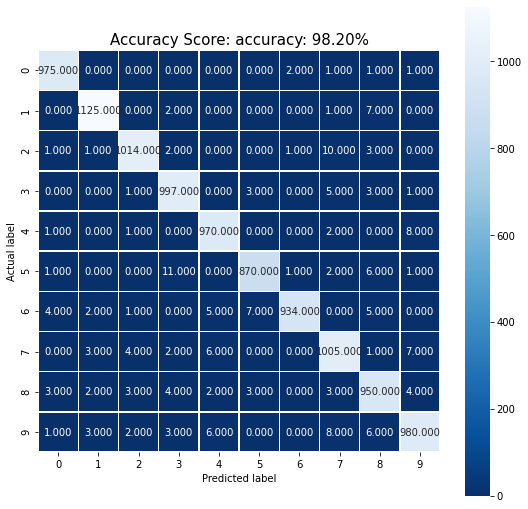

In [38]:
# Plot confusion matrix using seaborn library
cm  = metrics.confusion_matrix(y_test, ann_hog_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_hog_score)
plt.title(all_sample_title, size = 15);

##3.3 Local Binary Pattern (LBP)

###3.3.1 Variable definitions and conversions

In [39]:
ann_lbp_X_train = X_train.reshape(-1,28,28)/255.0 # unflatten and normalize the data
ann_lbp_X_test= X_test.reshape(-1,28,28)/255.0

# returns the size of the reshape
print("Train dataset after reshaping:{}".format(np.shape(ann_lbp_X_train)))
print("Test dataset after reshaping :{}".format(np.shape(ann_lbp_X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


###3.3.2 LBP function

LBP Feature extraction

In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the LBP features of the digits
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
	# Building the histogram to plot the patterns of the images features extracted
		(hist, _) = np.histogram(lbp.ravel(), #generates the histogram
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		hist = hist.astype("float") # normalize the histogram to ensure grayscale
		hist /= (hist.sum() + eps)
 
		# return the histogram generated by LBP
		return hist

LBP feature extraction for training model

In [0]:
# Initalize the LBP pattern descriptions with numpoints = 24 and radius = 8
desc = LocalBinaryPatterns(24, 8)
ann_lbp_data_train = [] # list for training data
ann_lbp_labels_train = []#list for label train 

for img_index in range(len(ann_lbp_X_train)): # loop over the training images
	image = (ann_lbp_X_train[img_index]) # load the image, convert it to grayscale, and extract LBP features
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	ann_lbp_labels_train.append(y_train[img_index])
	ann_lbp_data_train.append(hist)

In [0]:
ann_lbp_labels_train = np.asarray(ann_lbp_labels_train) #converts the list into an array
ann_lbp_data_train = np.asarray(ann_lbp_data_train) #converts the list into an array  

In [0]:
ann_lbp_model = Sequential() #sequential model 
ann_lbp_model.add(tf.keras.layers.Flatten()) #flattens the data again using tensor flow
ann_lbp_model.add(Dense(128, activation='relu')) #input layer
ann_lbp_model.add(Dense(128, activation='relu')) #input layer
ann_lbp_model.add(Dense(10, activation='softmax')) #output layer

In [49]:
ann_lbp_model.compile(
  optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy', #loss function for classes > 2
    metrics = ['accuracy']
)
ann_lbp_model.fit(
    ann_lbp_data_train, #The training data images
    ann_lbp_labels_train,#The trainind data labels, label data only returns a single digit representing the class of each label Ex: train_labels = 2,to_categorical(2)= [0,0,1,0,0,0,0,0,0,0]
    epochs=10, #Number of iterations over the entire data set to train on
    batch_size = 64 #The number of samples per gradient update for training
)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 1.9183 - accuracy: 0.2930
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.6731 - accuracy: 0.3985
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.5425 - accuracy: 0.4487
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.5003 - accuracy: 0.4613
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4795 - accuracy: 0.4701
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4627 - accuracy: 0.4746
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4485 - accuracy: 0.4813
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4391 - accuracy: 0.4841
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4276 - accuracy: 0.4894
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4181 - accuracy: 0.4918

###3.3.3 ANN + LBP Test

In [0]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
ann_lbp_data_test = []
ann_lbp_labels_test = []

# loop over the training images
for img_index in range(len(ann_lbp_X_test)):
	# load the image, convert it to grayscale, and extract LBP features
	image = (ann_lbp_X_test[img_index])
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	ann_lbp_labels_test.append(y_train[img_index])
	ann_lbp_data_test.append(hist)

###3.3.4 Test Score

In [0]:
ann_lbp_data_test = np.array(ann_lbp_data_test) 

In [52]:
ann_lbp_score = ann_lbp_model.evaluate(ann_lbp_data_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.3938 - accuracy: 0.4993


In [53]:
ann_lbp_accuracy = ann_lbp_model.metrics_names[1], ann_lbp_score[1]*100
print("%s: %.2f%%" % (ann_lbp_accuracy))

accuracy: 49.93%


Prediction

In [0]:
ann_lbp_pred = ann_lbp_model.predict_classes(ann_lbp_data_test)

###3.3.5 Confusion matrix

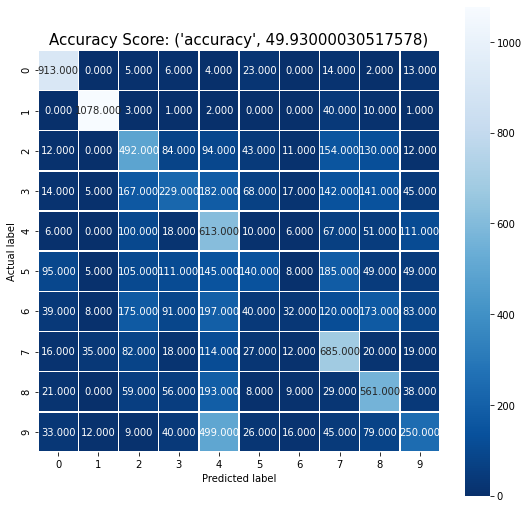

In [55]:
# Plot confusion matrix using seaborn library
cm  = metrics.confusion_matrix(y_test, ann_lbp_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_lbp_accuracy)
plt.title(all_sample_title, size = 15);